In [29]:
import os
from pathlib import Path
import shutil
import tifffile as tiff

tif_folder = "/Users/ashkanhzdr/workspace/dataset/plaques/full_dataset/dVGF_dF11_viruses/M061_20160921/tif/"
csv_root = "/Users/ashkanhzdr/workspace/dataset/plaques-ashkan/trackmate_output/dvGF_dF11_viruses/M061"
output_folder = "/Users/ashkanhzdr/workspace/dataset/plaques-ashkan/dVGF_dF11_viruses/train/"

# Moving files

In [32]:
# tif files are copied using script in fiji. look for .ijm file in dataset folder

In [31]:
# Copy csv files in csv_root to output_folder and rename them
import shutil
csv_files = os.listdir(csv_root)
# only keep the ones ending with .csv
csv_files = [f for f in csv_files if f.endswith('.csv')]

# copy csv files
for f in csv_files:
    # change the names in the destination folder. files are names as num-spots.csv
    # change them to be M061_num.csv
    new_name = "M061_" + f.split('-')[0] + '.csv'
    shutil.copy(os.path.join(csv_root, f), os.path.join(output_folder, new_name))


# Check Dataset

In [48]:
dataset_folder = "/Users/ashkanhzdr/workspace/dataset/plaques-ashkan/dVGF_dF11_viruses/train/"

# choose one of the tif files and the corresponding csv file in the dataset folder
tif_files = [f for f in os.listdir(dataset_folder) if f.endswith(".tif")]
tif_fn = tif_files[0]
csv_fn = tif_fn.replace(".tif", ".csv")
print(tif_fn)
print(csv_fn)

M061_57.tif
M061_57.csv


In [66]:
# Read CSV spots file with pandas
import pandas as pd
df = pd.read_csv(os.path.join(dataset_folder, csv_fn))
print(len(df))
df = df.drop(index=df.index[:3])
df["FRAME"] = df["FRAME"].astype(int)
df.head(20)

# print(df["FRAME"].dtype)

20145


,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,MEAN_INTENSITY_CH2,MEDIAN_INTENSITY_CH2,MIN_INTENSITY_CH2,MAX_INTENSITY_CH2,TOTAL_INTENSITY_CH2,STD_INTENSITY_CH2,CONTRAST_CH1,SNR_CH1,CONTRAST_CH2,SNR_CH2
3,ID664586,664586,0,47.712890625,1083.4043840462004,794.0217594869935,0.0,39604.471435546875,66,7.5,...,1073.952380952381,1148.0,591.0,1532.0,22553.0,284.3999782332053,0.2010633991955704,1.5141482145245357,0.3157958170045024,1.8126056680237126
4,ID662793,662793,0,33.873779296875,1079.5392479269437,828.6848040818363,0.0,11401.287231445312,19,7.5,...,733.047619047619,727.0,529.0,871.0,15394.0,90.62972811968278,0.15700835017468007,2.069294115145888,0.2393907837879926,3.124572961545575
5,ID665870,665870,0,48.6600341796875,1088.3058703576496,790.151768470888,0.0,48005.419921875,80,7.5,...,1091.1904761904761,1166.0,474.0,1493.0,22915.0,317.8755446786712,0.20711835065906248,1.501111226795985,0.323008809220662,1.6761970653529041
6,ID669966,669966,0,47.610107421875,1086.6413031975028,764.21282340802,0.0,68407.72338867188,114,7.5,...,1683.904761904762,1702.0,1131.0,2150.0,35362.0,304.00426062177235,0.18982869109344805,1.5886372813766994,0.16653359200241158,1.5815118507510058
7,ID678668,678668,0,52.68310546875,1082.1340637017986,755.7800094519712,0.0,93010.50109863281,155,7.5,...,2587.8571428571427,2605.0,2010.0,3393.0,54345.0,410.30955213281175,0.17488947128910856,1.3912784641809708,0.22068679037505742,2.2805035884520666
8,ID673026,673026,0,44.231201171875,1084.978460510752,760.690556929548,0.0,79208.94287109375,132,7.5,...,1869.095238095238,1933.0,1440.0,2211.0,39251.0,243.46168174107083,0.17363045935402488,1.4127885594824938,0.17000188458458831,2.2309918492495715
9,ID667393,667393,0,49.04034423828125,1089.0168186053982,766.983622234932,0.0,56406.368408203125,94,7.5,...,1433.7142857142858,1499.0,830.0,1783.0,30108.0,268.9137673785303,0.20105242050640135,1.5795525526194676,0.20933300354522222,1.84574359840411
10,ID662533,662533,0,23.963043212890625,1080.2282892778082,845.9187157369648,0.0,5400.6097412109375,9,7.5,...,657.5714285714286,667.0,548.0,737.0,13809.0,44.417982201549215,0.12665723446648397,1.9844744490765716,0.1832504650769491,4.585455746394068
11,ID664325,664325,0,43.6949462890625,1081.4179862660617,794.8210931411078,0.0,35403.99719238281,59,7.5,...,929.1904761904761,933.0,472.0,1365.0,19513.0,261.56425960891886,0.18253416783107232,1.2993422762578215,0.2715174779336774,1.5171614563316667
12,ID666629,666629,0,45.13848876953125,1088.4543627645924,780.1610948931341,0.0,52805.9619140625,88,7.5,...,1119.6190476190477,1088.0,475.0,1627.0,23512.0,358.7717207627262,0.1911345320443761,1.3162764804849871,0.2527570600753585,1.2592689838824231


In [72]:
# choose the rows in FRAME frame
frame = 5
df_frame = df[df["FRAME"] == frame]
print(len(df_frame))
df_frame.head()

13


,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,MEAN_INTENSITY_CH2,MEDIAN_INTENSITY_CH2,MIN_INTENSITY_CH2,MAX_INTENSITY_CH2,TOTAL_INTENSITY_CH2,STD_INTENSITY_CH2,CONTRAST_CH1,SNR_CH1,CONTRAST_CH2,SNR_CH2
52,ID662605,662605,0,24.380401611328125,1078.4342288227592,851.2461222213761,0.0,3000.3387451171875,5,7.5,...,589.7619047619048,583.0,503.0,666.0,12385.0,46.8624634029249,0.13786096816116977,2.7609510877428654,0.15508606757043655,3.379403394955015
211,ID662606,662606,1,49.126220703125,1102.5937728135505,862.3010049812168,0.0,3000.3387451171875,5,7.5,...,278.3809523809524,276.0,233.0,336.0,5846.0,24.723422478443776,0.1918182582173478,1.3524935872283232,-0.03154007875483218,-0.733401919964511
382,ID662603,662603,2,30.235260009765625,1119.9704266778517,831.1194722578368,0.0,3000.3387451171875,5,7.5,...,278.95238095238096,278.0,238.0,319.0,5858.0,20.333411397195974,0.15078536348839405,1.9146688871901825,-1.3250476680284703E-4,-0.0036361255693145396
558,ID662604,662604,3,32.3353271484375,1010.9414117081054,848.7831280780113,0.0,3000.3387451171875,5,7.5,...,283.85714285714283,282.0,254.0,320.0,5961.0,16.725088084329226,0.14434804315979977,1.4728873753260698,0.002023794515185041,0.06855668176885056
737,ID662612,662612,4,21.12322998046875,1119.7952391895876,921.4333324553294,0.0,3000.3387451171875,5,7.5,...,279.0952380952381,277.0,226.0,331.0,5861.0,22.02476960584324,0.09630595611285266,1.3645791060031969,-0.008617696546689662,-0.22030334085888914


In [73]:
import numpy as np
pos_x = df_frame["POSITION_X"].astype(float).values
pos_y = df_frame["POSITION_Y"].astype(float).values
pos_x /= 3.1746
pos_y /= 3.1746
spots = np.concatenate((pos_x.reshape(-1, 1), pos_y.reshape(-1, 1)), axis=1)

print(spots.shape)
spots

(13, 2)


array([[339.70712179, 268.14279664],
       [347.31738575, 271.62508819],
       [352.79103719, 261.80289556],
       [318.44686313, 267.36695271],
       [352.73585308, 290.25178998],
       [353.70398496, 279.2726843 ],
       [359.4228395 , 279.75907183],
       [331.88322635, 252.12022569],
       [331.23823574, 260.46775447],
       [323.80383148, 247.68669173],
       [341.49103855, 289.88946556],
       [323.09136272, 279.31059509],
       [328.88973167, 240.2161894 ]])

/Users/ashkanhzdr/workspace/dataset/plaques-ashkan/dVGF_dF11_viruses/train/M061_57.tif


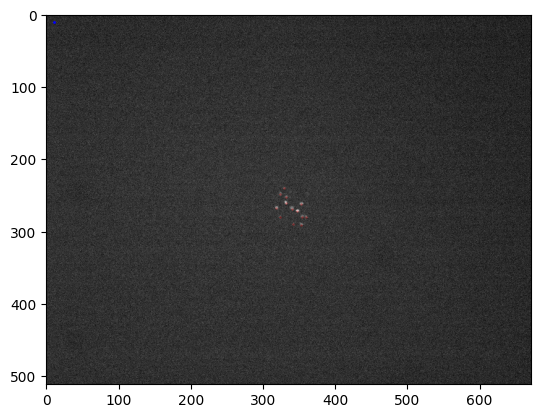

In [77]:
# show tiff image from file
import matplotlib.pyplot as plt
import tifffile

tif_file = os.path.join(dataset_folder, tif_fn)
print(tif_file)
with tifffile.TiffFile(tif_file) as tif:
    frame_img = tif.pages[frame].asarray()

plt.imshow(frame_img, cmap='gray')
# Plot frame_pos on the image using matplotlib.
plt.plot(spots[:, 0], spots[:, 1], 'ro', markersize=0.2)
plt.plot([10], [10], 'bo', markersize=1)